Financial Inclusion in Africa

The objective is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the training data
fin_data=pd.read_csv('Train.csv')
fin_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
#Quick Overview of the data
fin_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [5]:
fin_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [6]:
fin_data['uniqueid'].value_counts()

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64

In [7]:
fin_data['country'].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fin_data['Country_LabelEncoded'] = label_encoder.fit_transform(fin_data['country'])


In [9]:
fin_data['Country_LabelEncoded']

0        0
1        0
2        0
3        0
4        0
        ..
23519    3
23520    3
23521    3
23522    3
23523    3
Name: Country_LabelEncoded, Length: 23524, dtype: int32

In [10]:
fin_data['unique_id'] = fin_data['uniqueid'].astype(str) + 'x' + fin_data['Country_LabelEncoded'].astype(str)

In [11]:
fin_data['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [12]:
fin_data['bank_account']=fin_data['bank_account'].map({'Yes':1,'No': 0})

In [13]:
country=fin_data.groupby(['country','bank_account']).size().unstack().fillna(0)

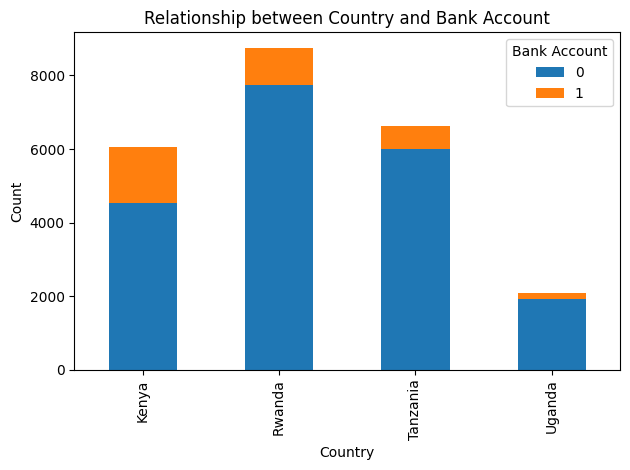

In [14]:
# Plotting a stacked bar plot
country.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Relationship between Country and Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [15]:
fin_data['age_of_respondent'].value_counts()

age_of_respondent
30     1056
35      836
25      792
28      748
32      715
       ... 
100       5
93        4
96        3
99        2
97        1
Name: count, Length: 85, dtype: int64

In [16]:
#distribution of bank_account among the age_of_respondent
distribution=fin_data.groupby(['age_of_respondent','bank_account']).size().unstack().fillna(0)

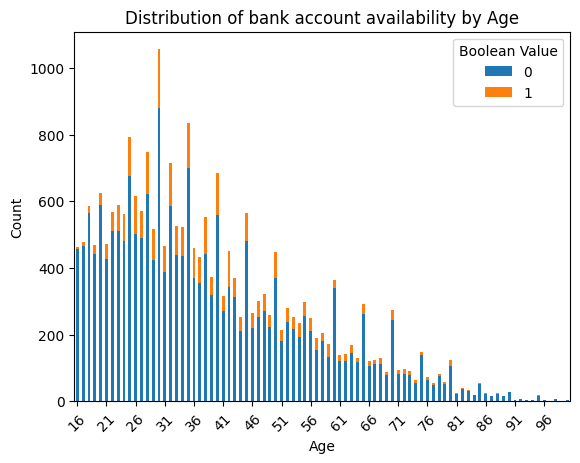

In [17]:
#Visualize distribution in a barplot
import matplotlib.pyplot as plt

distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of bank account availability by Age')
plt.legend(title='Boolean Value')
n = 5  
plt.xticks(range(0, len(distribution.index), n), distribution.index[::n], rotation=45)
plt.show()


In [18]:
fin_data['cellphone_access'].value_counts()

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

In [19]:
fin_data['cellphone_access']=fin_data['cellphone_access'].map({'Yes':1 , 'No':0})

In [20]:
# Cell pone Access relationship and Bank Account Access
grouped=fin_data.groupby(['cellphone_access','bank_account']).size().unstack().fillna(0)

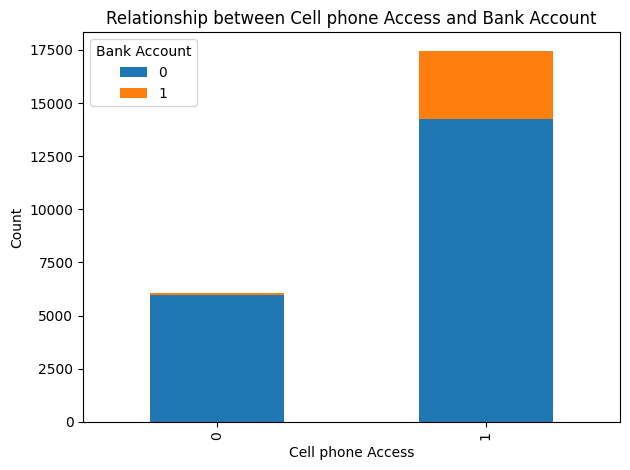

In [21]:
#Visualization of the above
# Plotting a stacked bar plot
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Cell phone Access')
plt.ylabel('Count')
plt.title('Relationship between Cell phone Access and Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

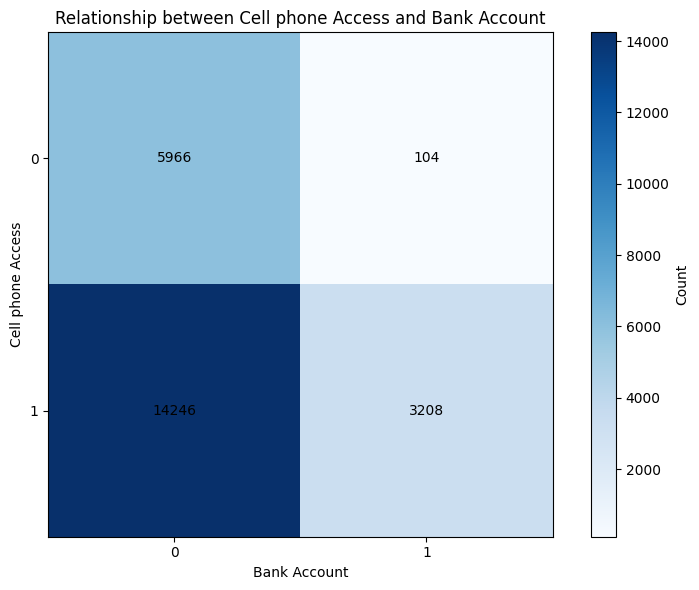

In [22]:
# Creating a contingency table to view the categorical values
contingency_table = pd.crosstab(fin_data['cellphone_access'], fin_data['bank_account'])

# Plotting a heatmap
plt.figure(figsize=(8, 6))
plt.title('Relationship between Cell phone Access and Bank Account')
plt.xlabel('Bank Account')
plt.ylabel('Cell phone Access')
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')

# Displaying the values in the heatmap
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')
plt.xticks(ticks=[0, 1], labels=contingency_table.columns)
plt.yticks(ticks=[0, 1], labels=contingency_table.index)
plt.tight_layout()
plt.show()


In [23]:
fin_data['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [24]:
education=fin_data.groupby(['education_level','bank_account']).size().unstack().fillna(0)

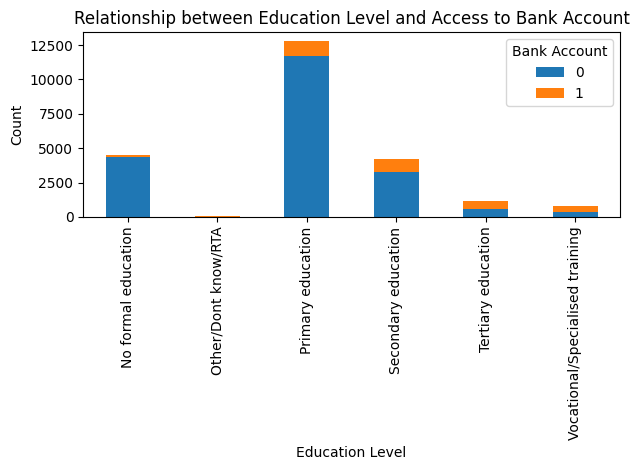

In [25]:
# Plotting a stacked bar plot
education.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship between Education Level and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [26]:
# Define the ordinal mapping
size_mapping = {'Primary education':1,'No formal education':2,'Secondary education':3,'Tertiary education':4,
                'Vocational/Specialised training':5,'Other/Dont know/RTA':6
                  }

fin_data['education_level']=fin_data['education_level'].map(size_mapping)




In [27]:
fin_data['gender_of_respondent'].value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

In [28]:
fin_data['gender_of_respondent']=fin_data['gender_of_respondent'].map({'Female':0,'Male':1})

In [29]:
gender=fin_data.groupby(['gender_of_respondent','bank_account']).size().unstack().fillna(0)

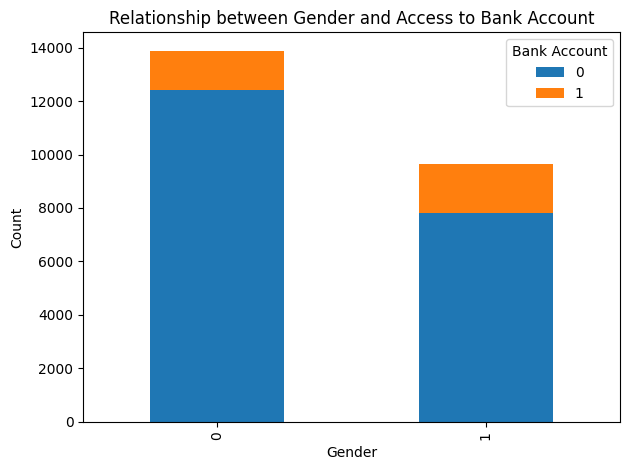

In [30]:
# Plotting a stacked bar plot
gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [31]:
fin_data['household_size'].value_counts()

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64

In [32]:
household=fin_data.groupby(['household_size','bank_account']).size().unstack().fillna(0)

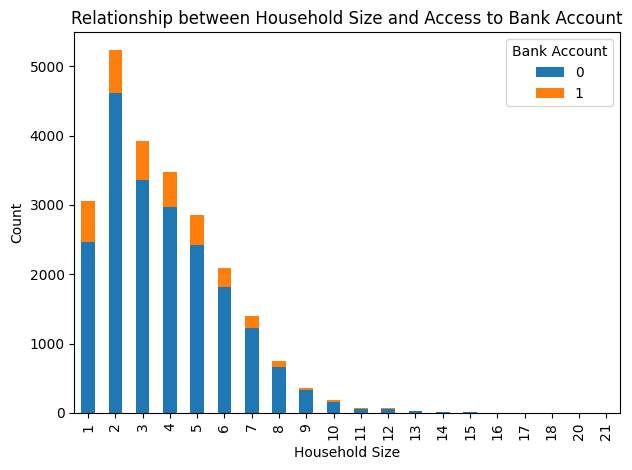

In [33]:
# Plotting a stacked bar plot
household.plot(kind='bar', stacked=True)
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title('Relationship between Household Size and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [34]:
fin_data['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [35]:
unique=fin_data['job_type'].unique()
unique

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [36]:
employment_mapping = {'No Income': 0, 'Informally employed': 1, 'Farming and Fishing': 2, 'Remittance Dependent': 3, 
                      'Other Income': 4, 'Self employed': 5, 'Government Dependent': 6, 'Formally employed Private': 7,
                      'Formally employed Government': 8, 'Dont Know/Refuse to answer': 9}

fin_data['Employment_Status_OrdinalEncoded'] = fin_data['job_type'].map(employment_mapping)


In [37]:
job=fin_data.groupby(['job_type','bank_account']).size().unstack().fillna(0)

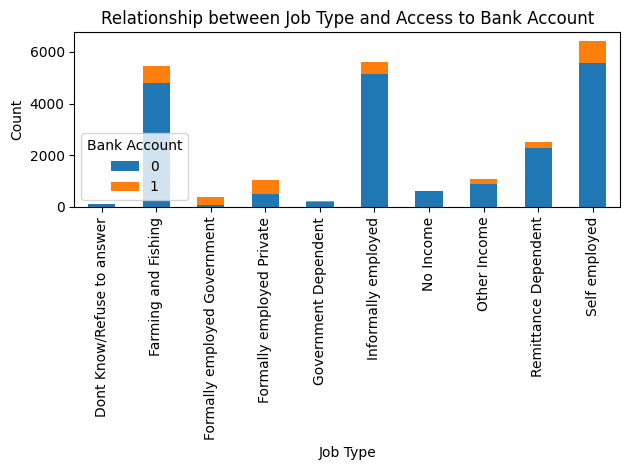

In [38]:
# Plotting a stacked bar plot
job.plot(kind='bar', stacked=True)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Relationship between Job Type and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [39]:
fin_data['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [40]:
fin_data['location_type']=fin_data['location_type'].map({'Rural':0,'Urban':1})

In [41]:
location=fin_data.groupby(['location_type','bank_account']).size().unstack().fillna(0)

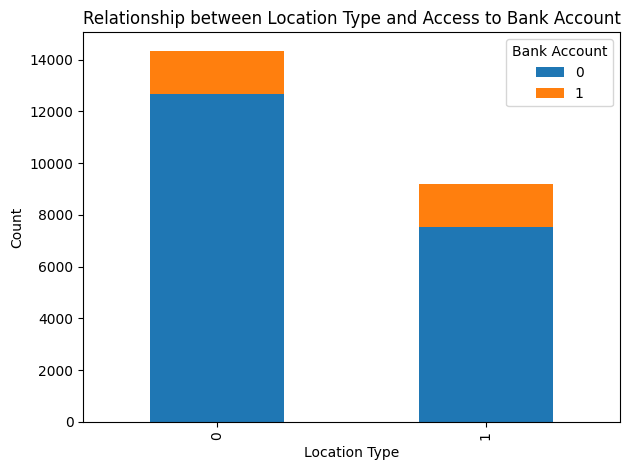

In [42]:
# Plotting a stacked bar plot
location.plot(kind='bar', stacked=True)
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.title('Relationship between Location Type and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [43]:
fin_data['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [44]:
marriage=fin_data.groupby(['marital_status','bank_account']).size().unstack().fillna(0)

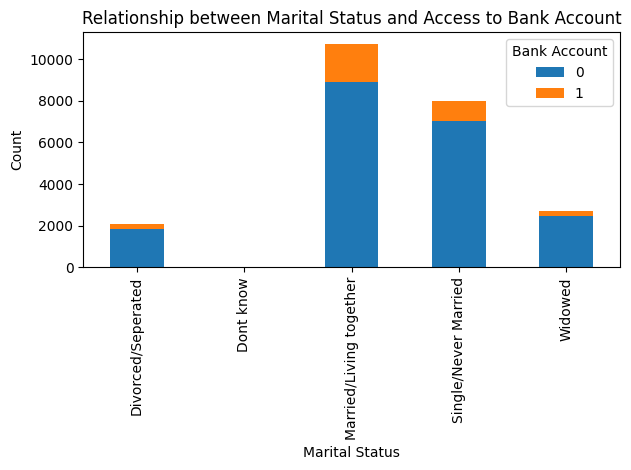

In [45]:
# Plotting a stacked bar plot
marriage.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Relationship between Marital Status and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [46]:
fin_data= pd.get_dummies(fin_data, columns=['marital_status'], prefix='marital_status')


In [47]:
fin_data['relationship_with_head'].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [48]:
relationship=fin_data.groupby(['relationship_with_head','bank_account']).size().unstack().fillna(0)

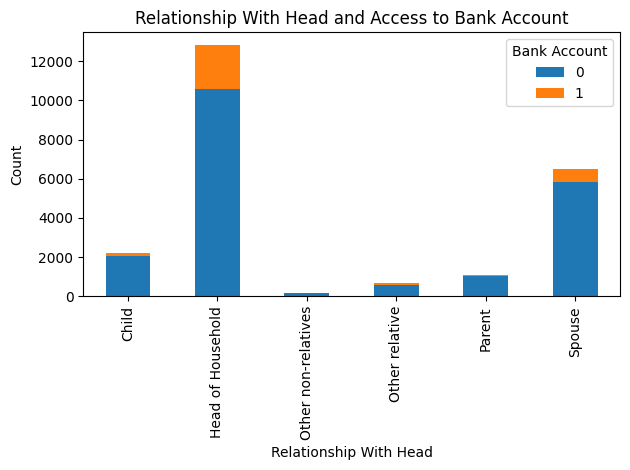

In [49]:
# Plotting a stacked bar plot
relationship.plot(kind='bar', stacked=True)
plt.xlabel('Relationship With Head')
plt.ylabel('Count')
plt.title('Relationship With Head and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [50]:
fin_data= pd.get_dummies(fin_data, columns=['relationship_with_head'], prefix='relationship_with_head')


In [51]:
# Permanently delete the unique_id
fin_data.drop('uniqueid', axis=1, inplace=True)

In [52]:
fin_data['year'].value_counts()

year
2016    8735
2018    8169
2017    6620
Name: count, dtype: int64

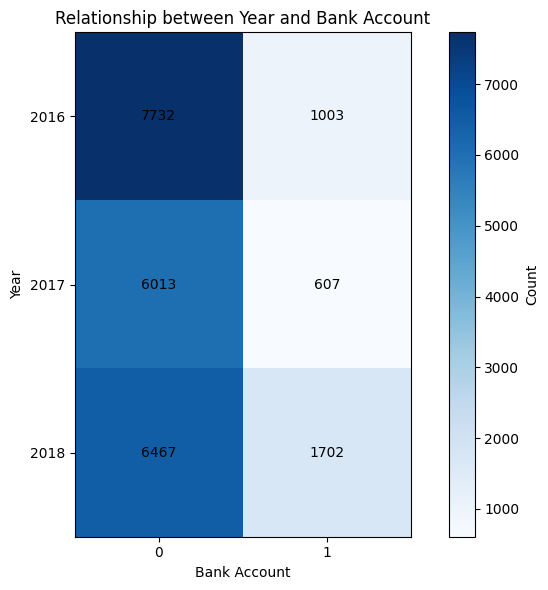

In [53]:
# Creating a contingency table to view the categorical values
contingency_table = pd.crosstab(fin_data['year'], fin_data['bank_account'])

# Plotting a heatmap
plt.figure(figsize=(8, 6))
plt.title('Relationship between Year and Bank Account')
plt.xlabel('Bank Account')
plt.ylabel('Year')
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')

# Displaying the values in the heatmap
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')

# Set ticks and labels based on the number of unique values
plt.xticks(ticks=range(len(contingency_table.columns)), labels=contingency_table.columns)
plt.yticks(ticks=range(len(contingency_table.index)), labels=contingency_table.index)

plt.tight_layout()
plt.show()



In [54]:
#Check for missing values
fin_data.isna().sum()

country                                       0
year                                          0
bank_account                                  0
location_type                                 0
cellphone_access                              0
household_size                                0
age_of_respondent                             0
gender_of_respondent                          0
education_level                               0
job_type                                      0
Country_LabelEncoded                          0
unique_id                                     0
Employment_Status_OrdinalEncoded              0
marital_status_Divorced/Seperated             0
marital_status_Dont know                      0
marital_status_Married/Living together        0
marital_status_Single/Never Married           0
marital_status_Widowed                        0
relationship_with_head_Child                  0
relationship_with_head_Head of Household      0
relationship_with_head_Other non-relativ

In [55]:
fin_data['gender_of_respondent'].unique()

array([0, 1], dtype=int64)

In [56]:
#Check for duplicates
fin_data.duplicated().sum()

0

In [57]:
fin_data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,job_type,...,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,Kenya,2018,1,0,1,3,24,0,3,Self employed,...,False,True,False,False,False,False,False,False,False,True
1,Kenya,2018,0,0,0,5,70,0,2,Government Dependent,...,False,False,False,True,False,True,False,False,False,False
2,Kenya,2018,1,1,1,5,26,1,5,Self employed,...,False,False,True,False,False,False,False,True,False,False
3,Kenya,2018,0,0,1,5,34,0,1,Formally employed Private,...,False,True,False,False,False,True,False,False,False,False
4,Kenya,2018,0,1,0,8,26,1,1,Informally employed,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,0,1,4,48,0,2,Other Income,...,False,False,False,False,False,True,False,False,False,False
23520,Uganda,2018,0,0,1,2,27,0,3,Other Income,...,False,False,True,False,False,True,False,False,False,False
23521,Uganda,2018,0,0,1,5,27,0,1,Other Income,...,False,False,False,True,False,False,False,False,True,False
23522,Uganda,2018,0,1,1,7,30,0,3,Self employed,...,False,False,False,False,False,False,False,False,True,False


Supervised Learning:Classification,Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [59]:
fin_data.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'education_level', 'job_type', 'Country_LabelEncoded', 'unique_id',
       'Employment_Status_OrdinalEncoded', 'marital_status_Divorced/Seperated',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse'],
      dtype='object')

In [60]:
#Splitting features and the target varaiable
X=fin_data[['year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'education_level', 'Country_LabelEncoded', 
       'Employment_Status_OrdinalEncoded', 'marital_status_Divorced/Seperated',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse']]
y=fin_data['bank_account']

In [61]:
X

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,Country_LabelEncoded,Employment_Status_OrdinalEncoded,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,2018,0,1,3,24,0,3,0,5,False,False,True,False,False,False,False,False,False,False,True
1,2018,0,0,5,70,0,2,0,6,False,False,False,False,True,False,True,False,False,False,False
2,2018,1,1,5,26,1,5,0,5,False,False,False,True,False,False,False,False,True,False,False
3,2018,0,1,5,34,0,1,0,7,False,False,True,False,False,False,True,False,False,False,False
4,2018,1,0,8,26,1,1,0,1,False,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,1,4,48,0,2,3,4,True,False,False,False,False,False,True,False,False,False,False
23520,2018,0,1,2,27,0,3,3,4,False,False,False,True,False,False,True,False,False,False,False
23521,2018,0,1,5,27,0,1,3,4,False,False,False,False,True,False,False,False,False,True,False
23522,2018,1,1,7,30,0,3,3,5,True,False,False,False,False,False,False,False,False,True,False


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


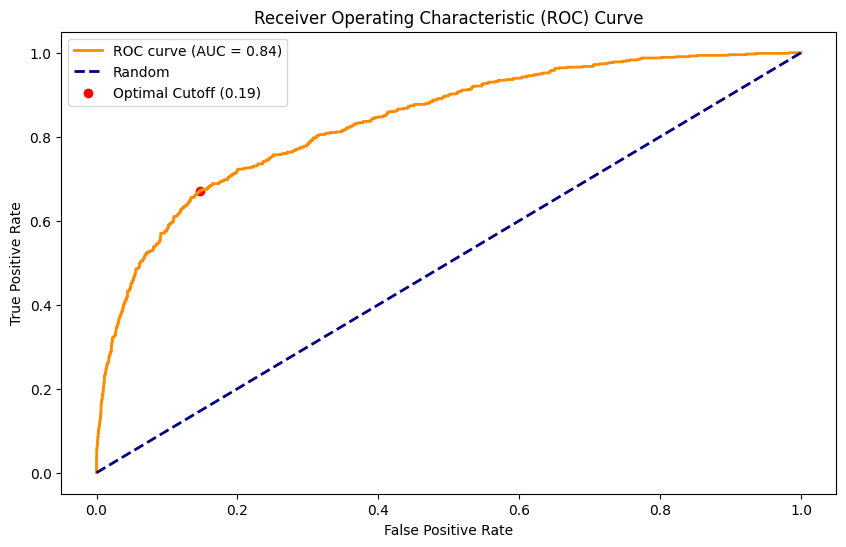

Accuracy with optimal cutoff: 0.83


In [68]:
from sklearn.metrics import roc_curve, auc, accuracy_score
# Predict probabilities on the test data
y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Find the optimal probability cutoff
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Highlight the optimal point on the ROC curve
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Cutoff ({optimal_threshold:.2f})')
plt.legend()

# Show the plot
plt.show()

# Adjust predictions using the optimal cutoff
y_pred_optimal = (y_prob > optimal_threshold).astype(int)

# Evaluate the model with the optimal cutoff
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal cutoff: {accuracy_optimal:.2f}")

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train_scaled , y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")


Decision Tree Accuracy: 0.84


In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the SVM model
svm_model = SVC(random_state=42)

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")


SVM Accuracy: 0.89


In [71]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.87


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")


Gradient Boosting Accuracy: 0.89


In [73]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(random_state=42)

# Fit the model on the training data
ada_boost.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_ada = ada_boost.predict(X_test_scaled)

# Evaluate the AdaBoost model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.2f}")


AdaBoost Accuracy: 0.89


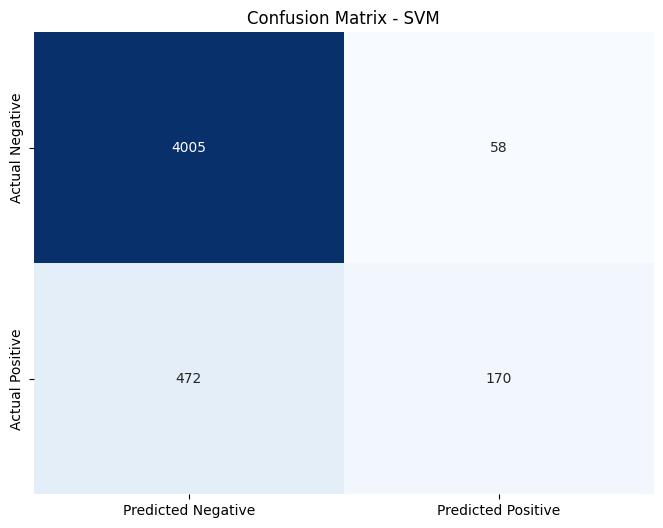

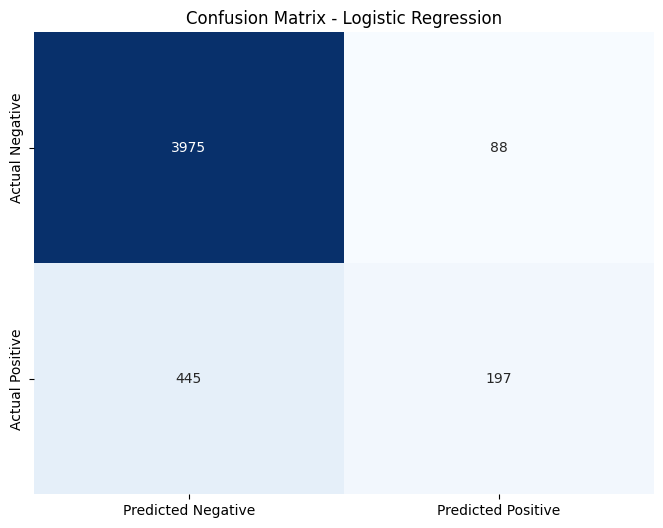

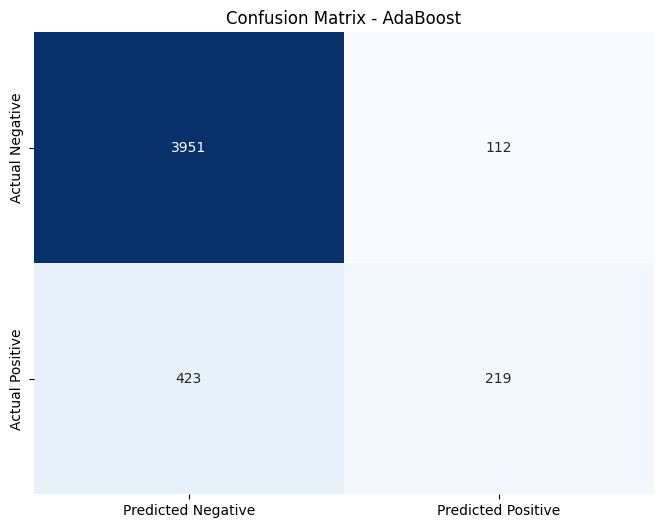

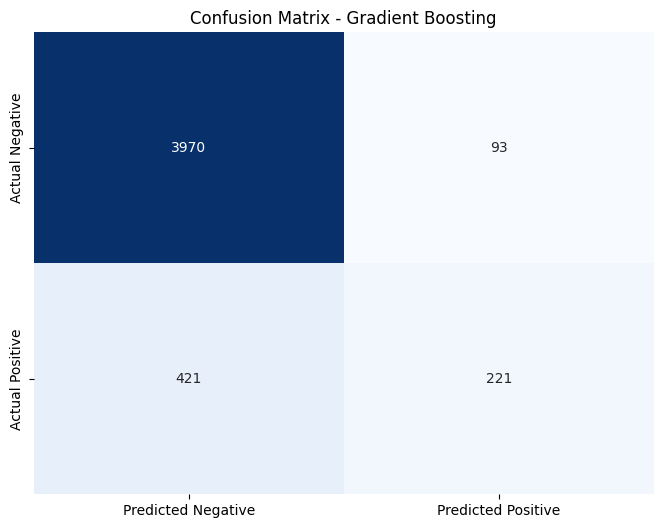

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Initialize classifiers
classifiers = {
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Iterate through each classifier
for clf_name, clf in classifiers.items():
    # Fit the model on the training data
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test_scaled)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()

In [76]:
from sklearn.metrics import classification_report
# Iterate through each classifier
for clf_name, clf in classifiers.items():
    # Fit the model on the training data
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test_scaled)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f'Classification Report - {clf_name}:\n{report}\n')

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4063
           1       0.75      0.26      0.39       642

    accuracy                           0.89      4705
   macro avg       0.82      0.63      0.66      4705
weighted avg       0.87      0.89      0.86      4705


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4063
           1       0.69      0.31      0.43       642

    accuracy                           0.89      4705
   macro avg       0.80      0.64      0.68      4705
weighted avg       0.87      0.89      0.87      4705


Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4063
           1       0.66      0.34      0.45       642

    accuracy                           0.89      4705
   macro avg      

In [77]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
#Define the cross-validation strategy (e.g., 5-fold cross-validation)
cv = 5

# Iterate through each classifier
for clf_name, clf in classifiers.items():
    # Perform cross-validation and obtain accuracy scores
    cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

    # Display the cross-validation results
    print(f'Cross-Validation Results - {clf_name}:')
    print(f'Mean Accuracy: {np.mean(cv_scores):.2f}')
    print(f'Standard Deviation: {np.std(cv_scores):.2f}')
    print('\n')

Cross-Validation Results - SVM:
Mean Accuracy: 0.86
Standard Deviation: 0.00




c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross-Validation Results - Logistic Regression:
Mean Accuracy: 0.85
Standard Deviation: 0.05


Cross-Validation Results - AdaBoost:
Mean Accuracy: 0.83
Standard Deviation: 0.08


Cross-Validation Results - Gradient Boosting:
Mean Accuracy: 0.83
Standard Deviation: 0.10




In [78]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grids for each classifier
param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}
}

# Iterate through each classifier
for clf_name, clf in classifiers.items():
    # Initialize GridSearchCV with the classifier and hyperparameter grid
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model on the training data
    grid_search.fit(X_train, y_train)

    # Display the best hyperparameters and corresponding accuracy
    print(f'Best Hyperparameters - {clf_name}: {grid_search.best_params_}')
    print(f'Best Accuracy: {grid_search.best_score_:.2f}\n')

    # Make predictions on the test data using the best model
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.2f}\n')

Best Hyperparameters - SVM: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 0.87

Test Accuracy: 0.88



c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_so

Best Hyperparameters - Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Accuracy: 0.88

Test Accuracy: 0.89

Best Hyperparameters - AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Best Accuracy: 0.88

Test Accuracy: 0.89

Best Hyperparameters - Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Accuracy: 0.89

Test Accuracy: 0.89



In [79]:
from sklearn.ensemble import VotingClassifier
# Initialize base models with best hyperparameters
logreg_model = LogisticRegression(C=1, penalty='l2', random_state=42)
adaboost_model = AdaBoostClassifier(learning_rate=1.0, n_estimators=200, random_state=42)
gradboost_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('logreg', logreg_model), ('adaboost', adaboost_model), ('gradboost', gradboost_model)],
    voting='hard'  # 'hard' voting combines predictions by majority voting
)

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the ensemble model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

# Print the results
print(f'Ensemble Model (Voting Classifier) - Accuracy: {accuracy_voting:.2f}\n')
print(f'Classification Report:\n{classification_report_voting}')

Ensemble Model (Voting Classifier) - Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4063
           1       0.69      0.34      0.46       642

    accuracy                           0.89      4705
   macro avg       0.80      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705



In [ ]:
#testdata
test_data=pd.read_csv('Test.csv')

In [ ]:
test_data.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
test_data.duplicated().sum()

0

In [ ]:
#Splitting features and the target varaiable
X_test=test_data[['country','location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']]


In [ ]:
# Use the trained model to predict target values for the test set (X_test)
y_pred = clf.predict(X_test)

# This will give you the predicted target values based on the features in X_test
print("Predicted y values:", y_pred)


Predicted y values: ['Yes' 'Yes' 'No' ... 'No' 'No' 'No']


In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],
                           "bank_account": y_pred})

In [ ]:
# Save the DataFrame to a CSV file
submission.to_csv('predicted_values_lr.csv', index=False)

In [ ]:
%store preprocessor
%store X_train
%store X_test
%store y_train



Stored 'preprocessor' (ColumnTransformer)
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)


In [ ]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Find the optimal probability cutoff
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Highlight the optimal point on the ROC curve
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Cutoff ({optimal_threshold:.2f})')
plt.legend()

# Show the plot
plt.show()

# Adjust predictions using the optimal cutoff
y_pred_optimal = (y_prob > optimal_threshold).astype(int)